### 연습
1. csv폴더 안에 있는 num_1 폴더에 있는 chipotle.tsv로드
2. order_id 컬럼의 데이터의 타입을 str로 변경(이유는? 통계요약정보(describe()숫자형의 데이터만 계산))
3. 가장 많이 주문한 item_name을 출력
4. item당 주문 총량의 top10을 바 그래프로 표시
5. item_price의 '$'를 제거하고 데이터의 타입을 float현태로 변경
6. 주문당 평균 계산 금액 출력

In [86]:
import pandas as pd


In [87]:
df =pd.read_csv("../csv/num_1/chipotle.tsv", sep='\t')

In [88]:
df['order_id']= df['order_id'].astype(str)

In [89]:
import matplotlib.pyplot as plt

In [90]:
top10 = df.groupby('item_name')['quantity'].sum().sort_values(ascending= False)

top10.index[0]

'Chicken Bowl'

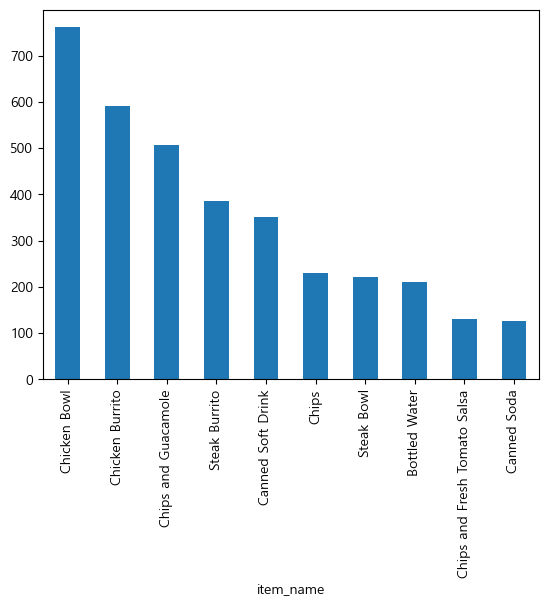

In [91]:
# 상위 10개만 그래프로 표시
top10.head(10).plot.bar() # 가장 쉬운 방법
plt.rc('font',family='Malgun Gothic')



In [92]:
# 누운 그래프
# x= top10.head(10).index
# y= top10.head(10)['quantity']

# plt.barh(x,y)
# plt.show

In [93]:
df['item_price'] = df['item_price'].str.replace('$','').astype(float)
# 스리즈 형태이기 때문에 문자열을 지울 수 있는 str을 넣어서 replace를 실행시켜야 $를 제거하는 replace가 실행 됌
# case 2
# df['item_price'].str.lstrip('$')
# case 3
# def change(x): x의 데이터 타입? --> 문자
    #x.replace("$","")
    #x.lstip("$","")
    #retun x
# df['item_price'].apply(change)

#case 4
#df['item_price'].apply(lambda y:y("$",""))

C:\Users\bjw\AppData\Local\Temp\ipykernel_21616\2477744176.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = df['item_price'].str.replace('$','').astype(float)


In [94]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [95]:
avg = df.groupby('order_id')['item_price'].sum().mean()

In [96]:
avg

18.811428571428568

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


In [120]:
# chicken bowl이 메뉴를 2개 이상 주문한 고객들이 주문한 chicken bowl의 평균 주문 수량
# df['quantity']>=2, df['item_name']==Chicken Bowl]
df.loc[(df['quantity']>=2) & (df['item_name'] =='Chicken Bowl')]['quantity'].mean()

2.0606060606060606

In [108]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
